In [2]:
%matplotlib inline

In [3]:
# D. van den Berg
# Source: http://christopher5106.github.io/deep/learning/2015/09/04/Deep-learning-tutorial-on-Caffe-Technology.html

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from PIL import Image
import sys
sys.path.append('/home/philipp/caffe/python') 
import caffe

# finding the activation values of the last fully connected neuron layer (fc7) for a single image input

#Init
caffe.set_mode_cpu()

#load the model
model_path = '/home/philipp/caffe/models/bvlc_reference_caffenet/'
# net_fn   = model_path + '/bck/deploy.prototxt'

net_fn = model_path + 'deploy.prototxt'

# UnicodeDecodeError
# import gzip
# fp = gzip.open(model_path + r'caffenet_train_iter_10000.caffemodel.gz')
# param_fn = fp.read() # contents now has the uncompressed bytes of foo.gz
# fp.close()
# param_fn = param_fn.decode('ascii') # u_str is now a unicode string

param_fn = model_path+ 'caffenet_train_iter_80.caffemodel'
# param_fn = model_path + 'caffenet_train_iter_45000.caffemodel'

net = caffe.Net(net_fn,
                param_fn,
                caffe.TEST)

# load input and configure preprocessing
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer_path ='/home/philipp/caffe/python/caffe/imagenet/'
transformer.set_mean('data', np.load(transformer_path+'ilsvrc_2012_mean.npy').mean(1).mean(1))
transformer.set_transpose('data', (2,0,1))
transformer.set_channel_swap('data', (2,1,0))
transformer.set_raw_scale('data', 255.0)

#note we can change the batch size on-the-fly
#since we classify only one image, we change batch size from 10 to 1
net.blobs['data'].reshape(1,3,227,227)

#load the image in the data layer
image_path = 'AVA/trainingset/preprocesed/'
image_name = '514959.jpg'
im = caffe.io.load_image(image_path+image_name)
net.blobs['data'].data[...] = transformer.preprocess('data', im)

#compute
out = net.forward()

# other possibility : out = net.forward_all(data=np.asarray([transformer.preprocess('data', im)]))



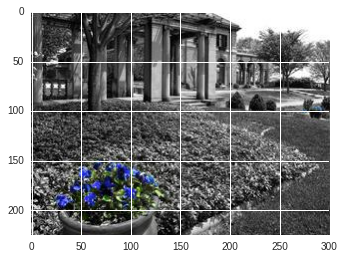

In [4]:
plt.imshow(im);

##### Show Predicted class

In [5]:
print(out['prob'].argmax())

1


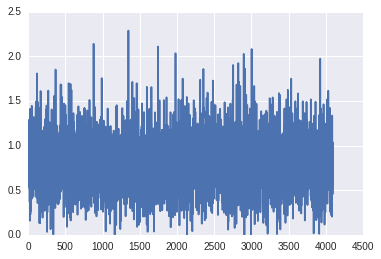

In [6]:
x = net.blobs['fc6']
plt.plot(x.data[0]);

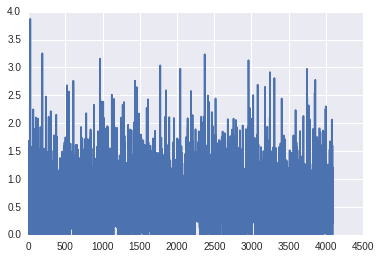

In [7]:
x = net.blobs['fc7']
plt.plot(x.data[0]);

In [10]:
x.data[0].max()

3.8687201

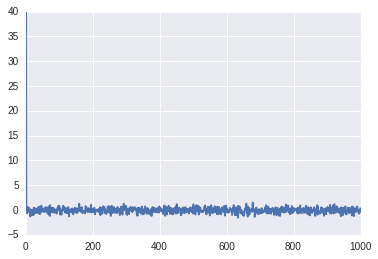

In [12]:
x = net.blobs['fc8']
plt.plot(x.data[0]);

In [13]:
x.data[0].max()

39.927769

In [14]:
x.data[0]

array([  3.62246552e+01,   3.99277687e+01,  -3.02071869e-01,
         1.79702342e-02,  -6.78371429e-01,   6.39495373e-01,
        -3.38523895e-01,  -5.28335646e-02,   2.78862625e-01,
         5.09568632e-01,   6.51396662e-02,  -4.61655021e-01,
         8.88332501e-02,   1.85635969e-01,  -1.33006811e+00,
        -2.88270600e-02,  -3.85434538e-01,  -1.10541182e-02,
        -4.62652966e-02,  -1.02759326e+00,  -9.31366310e-02,
        -1.80433653e-02,  -7.52207875e-01,  -1.05485439e+00,
         4.67289060e-01,  -6.07699513e-01,  -7.43994534e-01,
         4.15584683e-01,  -1.41426427e-02,  -5.84290743e-01,
         1.03376590e-01,   1.02896810e-01,   2.90084422e-01,
        -1.90605134e-01,  -6.05242252e-01,  -1.66707579e-02,
         2.32820064e-01,  -5.21521270e-01,   5.88342786e-01,
        -4.28138785e-02,   3.87860864e-01,  -8.01746964e-01,
         7.10841537e-01,  -8.10079455e-01,  -1.33223116e-01,
         6.03735268e-01,  -1.01938270e-01,   8.94102216e-01,
        -4.02276903e-01,

In [15]:
len(x.data[0])

1000

In [16]:
import os
print 'number of image files: ', len(os.walk('AVA/trainingset/preprocesed').next()[2])

number of image files:  2500


In [ ]:
def get_activation_fc7(image):
#load the image in the data layer
    im = caffe.io.load_image(image)
    net.blobs['data'].data[...] = transformer.preprocess('data', im)
    x = net.blobs['fc7']
    
# other possibility : out = net.forward_all(data=np.asarray([transformer.preprocess('data', im)]))

    # return activations of neuron layer and predicted class as label   
    return x.data[0]

In [ ]:
import glob

labels = np.loadtxt("/home/philipp/caffe/caffe-master/data/ilsvrc12/synset_words.txt", str, delimiter='\t')

image_path = "AVA/trainingset/preprocesed/*.jpg"

nr_images  = len(glob.glob(image_path))

my_array = np.zeros((nr_images, 4096)) #np array rows, columns
for row_number, image in enumerate(glob.glob(image_path)): #fill an entire row
    my_array[row_number:] = get_activation_fc7(image)  
    

In [ ]:
# def get_activation_fc7_and_label(image):
# #load the image in the data layer
#     im = caffe.io.load_image(image)
#     net.blobs['data'].data[...] = transformer.preprocess('data', im)
#     x = net.blobs['fc7']
    
#     out = net.forward()

# # other possibility : out = net.forward_all(data=np.asarray([transformer.preprocess('data', im)]))

#     # return activations of neuron layer and predicted class as label   
#     return x.data[0], labels[out['prob'].argmax()]

In [ ]:
# import glob

# labels = np.loadtxt("/home/philipp/caffe/caffe-master/data/ilsvrc12/synset_words.txt", str, delimiter='\t')

# image_path = "AVA/trainingset/preprocesed/*.jpg"

# nr_images  = len(glob.glob(image_path))

# # dict_arrays = dict((x, my_array) for x in labels)

# my_array = np.zeros((nr_images, 4096)) #np array rows, columns
# for row_number, image in enumerate(glob.glob(image_path)): #fill an entire row
#     activations, label     =    get_activation_fc7_and_label(image)  
#     if label == 'n04592741 wing':
#         print 'Condition True for wing label'
#         my_array[row_number:] =     activations

In [ ]:
labels[908]

In [ ]:
len(labels)

In [ ]:
my_array[0].min()

In [ ]:
my_array[0].max()

In [ ]:
np.savetxt("Neuron_activation_penultimate_layer/{}.csv".format(image_name), my_array, delimiter=",")

In [ ]:
# from numpy import genfromtxt
my_data = np.genfromtxt("Neuron_activation_penultimate_layer/{}.csv".format(image_name), delimiter=',')

In [ ]:
mydata = my_array

#### Singular Value Decomposition (SVD)
The singular values are the spuare root of the eigenvalues of Data*Data.T 

In essence, SVD is a data summary method. It extracts important features from data. Because of its ability to reconstruct an original dataset from an compressed dataset, SVD can be used as efficient image compression method. 

In [ ]:
dataT = my_data.T
P, D, Q = np.linalg.svd(dataT)

In [ ]:
dataT.shape[1]

In [ ]:
len(P), len(D), len(Q)

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.plot(P[:,1])

plt.subplot(122)
plt.plot((np.absolute(P[:,1])));

In [ ]:
import pandas as pd
df_P = pd.DataFrame(P[:,1])

In [ ]:
print 'Neuron with max positive activation: ', df_P.idxmax()[0], '    Neuron with max negative activation: ', df_P.idxmin()[0]

In [ ]:
eigvals = D**2 / np.cumsum(D)[-1]

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(dataT.shape[1]) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Screeplot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.xlim([0, 5])
plt.show()

In [ ]:
D

In [ ]:
Q =  Q * 10000000
plt.imshow(Q, interpolation='none', cmap='jet')
ax = plt.gca()
plt.title("$V$")
plt.yscale=('log')
plt.xscale=('log')
ax.grid(b=False)
plt.colorbar();